In [3]:
# Usefull imports
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 3000)


# Import Datasets and check their Infos

In [4]:
cities_df = pd.read_csv("./datasets/cities.csv")
providers_df = pd.read_csv("./datasets/providers.csv")
stations_df = pd.read_csv("./datasets/stations.csv")
ticket_df = pd.read_csv("./datasets/ticket_data.csv")


In [5]:
cities_df

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [6]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [7]:
providers_df

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [8]:
providers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [9]:
stations_df

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [10]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [11]:
ticket_df

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [12]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [13]:
# Drop duplicates in ticket_df
ticket_df.drop_duplicates(inplace=True)
print(len(ticket_df))

74168


There is no duplicated instances

## DATA ANALYSIS

# Min, Max, Mean of Price

In [14]:
# check if we have missing ticket prices
ticket_df['price_in_cents'].isnull().values.any()

False

In [15]:
min_price = ticket_df['price_in_cents'].min()
max_price = ticket_df['price_in_cents'].max()
mean_price = ticket_df['price_in_cents'].mean()
print(f"The minium price of a ticket is: {min_price} cents")
print(f"The maximum price of a ticket is: {max_price} cents")
print(f"The mean price of a ticket is: {mean_price} cents")

The minium price of a ticket is: 300 cents
The maximum price of a ticket is: 38550 cents
The mean price of a ticket is: 4382.711061374178 cents


# Min, Max and Mean of the duration and price per trip

In [16]:
ticket_df['duration'] = (pd.to_datetime(
    ticket_df.arrival_ts) - pd.to_datetime(ticket_df.departure_ts))

In [17]:
print(f"The minimum of the duration is {min(ticket_df.duration)}")
print(f"The maximum of the duration is {max(ticket_df.duration)}")

The minimum of the duration is 0 days 00:20:00
The maximum of the duration is 20 days 12:51:00


In [18]:
#I choosed to group the price and the duration by cities and not stations because 
#we have missing values of o_stations and d_stations
res1 = ticket_df.groupby([ticket_df.o_city, ticket_df.d_city]).agg({ 
  'price_in_cents' : ['mean', 'min', 'max'],
  'duration' : ['mean', 'min', 'max']
  }).reset_index()

In [19]:
print("Mean, Min and Max of price and duration per trip: ")
res1

Mean, Min and Max of price and duration per trip: 


o_city d_city price_in_cents                                duration                                
                             mean    min    max                      mean             min             max
0         5     23   20320.000000  18600  22000           0 days 10:18:48 0 days 08:53:00 0 days 15:54:00
1         6    227   11755.000000   9860  13650           0 days 13:42:30 0 days 12:24:00 0 days 15:01:00
2         6    504    4042.666667   2000   8920           0 days 08:17:24 0 days 05:36:00 0 days 12:20:00
3         6    628    2797.500000   2600   3190           0 days 12:10:00 0 days 09:40:00 0 days 14:30:00
4         6    845     864.626866    700   2420 0 days 01:19:54.626865671 0 days 01:00:00 0 days 04:11:00
...     ...    ...            ...    ...    ...                       ...             ...             ...
1432  11938    126    4204.861111   3000   5350 0 days 07:25:16.666666666 0 days 05:30:00 1 days 11:20:00
1433  12124   1064    6950.000000   6000   7900           0 days 17:10:00 0 days 11:10:00 0 days 23:10:00
1434  12166    857    5300.000000   5300   5300           0 days 21:55:00 0 days 21:55:00 0 days 21:55:00
1435  12190    639     688.888889    600    850 0 days 01:28:53.333333333 0 days 01:10:00 0 days 02:40:00
1436  12190   8937    9800.000000   9800   9800           0 days 09:10:00 0 days 09:10:00 0 days 09:10:00

[1437 rows x 8 columns]

# Difference in average price and duration according to train, bus and carpool

In [20]:
providers_df.transport_type.value_counts()

bus           214
train          10
carpooling      2
car             1
Name: transport_type, dtype: int64

In [21]:
providers_df = providers_df[['id', 'transport_type']]
providers_df.rename(columns={'id': 'company'}, inplace=True)
providers_df

C:\Users\Sarah Benabdallah\AppData\Local\Temp\ipykernel_17672\2348714433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  providers_df.rename(columns={'id': 'company'}, inplace=True)


,company,transport_type
0,9,bus
1,10,bus
2,11,bus
3,12,bus
4,13,bus
...,...,...
222,8384,train
223,8385,carpooling
224,8387,bus
225,8388,bus


In [22]:
#Add transport_type to ticket_df bya merge
ticket_df = pd.merge(providers_df, ticket_df ,how='right', on='company')

In [23]:
ticket_df

,company,transport_type,id,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration
0,8385,carpooling,6795025,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00
1,9,bus,6795026,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00
2,8377,train,6795027,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00
3,8377,train,6795028,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00
4,8381,train,6795029,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,13,bus,6869182,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00
74164,9,bus,6869185,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00
74165,8371,bus,6869187,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00
74166,13,bus,6869189,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00


In [24]:
res2 = ticket_df.groupby(ticket_df.transport_type).agg({
    'price_in_cents': 'mean',
    'duration': 'mean'
}).reset_index()


In [25]:
print("Mean of price and duration per transport type: ")
res2

Mean of price and duration per transport type: 


,transport_type,price_in_cents,duration
0,bus,3652.448036,0 days 15:37:59.769531816
1,carpooling,2742.171907,0 days 04:06:38.330156125
2,train,8506.634793,0 days 07:20:03.435997675


# Difference in average price and duration according to the distance of the trip (0-200km, 201-800km, 800-2000km, 2000+km)

In [26]:
# To calculate the distance of a trip we calculate the difference between two city points (lat1,long1) and (lat2,long2)
cities_df["localisation"] = cities_df[[
    "latitude", "longitude"]].apply(tuple, axis=1)
cities_df

,id,local_name,unique_name,latitude,longitude,population,localisation
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0,"(45.4064349, 11.8767611)"
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0,"(41.3850639, 2.1734035)"
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN,"(47.5934368, 7.6198121)"
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0,"(49.5896744, 11.0119611)"
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN,"(44.3533537, 24.0956725)"
...,...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN,"(50.65425, 3.04769)"
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN,"(50.4501, 30.5234)"
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN,"(50.822, -0.1374)"
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN,"(39.493, -0.4621)"


In [27]:
o_cities_df = cities_df[['id', 'localisation']]
o_cities_df.rename(
    columns={'id': 'o_city', 'localisation': 'o_localisation'}, inplace=True)
o_cities_df

C:\Users\Sarah Benabdallah\AppData\Local\Temp\ipykernel_17672\2298635687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_cities_df.rename(


,o_city,o_localisation
0,5159,"(45.4064349, 11.8767611)"
1,76,"(41.3850639, 2.1734035)"
2,81,"(47.5934368, 7.6198121)"
3,259,"(49.5896744, 11.0119611)"
4,11979,"(44.3533537, 24.0956725)"
...,...,...
8035,9964,"(50.65425, 3.04769)"
8036,10863,"(50.4501, 30.5234)"
8037,11144,"(50.822, -0.1374)"
8038,11377,"(39.493, -0.4621)"


In [28]:
d_cities_df = cities_df[['id', 'localisation']]
d_cities_df.rename(
    columns={'id': 'd_city', 'localisation': 'd_localisation'}, inplace=True)
d_cities_df

C:\Users\Sarah Benabdallah\AppData\Local\Temp\ipykernel_17672\2411889578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cities_df.rename(


,d_city,d_localisation
0,5159,"(45.4064349, 11.8767611)"
1,76,"(41.3850639, 2.1734035)"
2,81,"(47.5934368, 7.6198121)"
3,259,"(49.5896744, 11.0119611)"
4,11979,"(44.3533537, 24.0956725)"
...,...,...
8035,9964,"(50.65425, 3.04769)"
8036,10863,"(50.4501, 30.5234)"
8037,11144,"(50.822, -0.1374)"
8038,11377,"(39.493, -0.4621)"


In [29]:
# haversine package to calculate distances between cities
# https://pypi.org/project/haversine/
!pip install haversine



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from haversine import haversine, Unit
ticket_df_copy = ticket_df.copy()
distances = []
for index, row in ticket_df_copy.iterrows():
  # print("--------------",row.o_city, row.d_city)
  origin = o_cities_df[o_cities_df.o_city == row.o_city].o_localisation
  destination = d_cities_df[d_cities_df.d_city == row.d_city].d_localisation
  # print(tuple(origin)[0], tuple(destination)[0])
  distances.append(haversine(tuple(origin)[0], tuple(destination)[0]))


In [31]:
ticket_df["distance"] = distances
ticket_df

,company,transport_type,id,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,distance
0,8385,carpooling,6795025,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,503.197862
1,9,bus,6795026,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,503.197862
2,8377,train,6795027,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,503.197862
3,8377,train,6795028,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,503.197862
4,8381,train,6795029,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,503.197862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,13,bus,6869182,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00,338.320602
74164,9,bus,6869185,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00,338.320602
74165,8371,bus,6869187,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00,338.320602
74166,13,bus,6869189,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00,338.320602


In [32]:
#Split distances into categories
def categ(distance):
  if distance <= 200: 
    return 0
  elif distance > 200 and distance <= 800:
    return 1
  elif distance > 800 and distance <= 2000:
    return 2
  else:
    return 3

In [33]:
ticket_df["km_category"] = ticket_df["distance"].apply(categ)

In [34]:
ticket_df.km_category.value_counts()

1    58877
0    13724
2     1567
Name: km_category, dtype: int64

In [35]:
res3 = ticket_df.groupby(ticket_df.km_category).agg({
    'price_in_cents': 'mean',
    'duration': 'mean'
}).reset_index()


In [36]:
print("Mean of price and duration per distance: ")
res3

Mean of price and duration per distance: 


,km_category,price_in_cents,duration
0,0,1678.972311,0 days 03:08:23.651996502
1,1,4893.836592,0 days 07:34:10.725750292
2,2,8857.869177,0 days 23:02:56.515634971


# PLOTS

In [37]:
def plot_res(x, y, xlabel, ylabel):
  plt.figure(figsize=(10, 10), dpi=80)
  plt.scatter(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

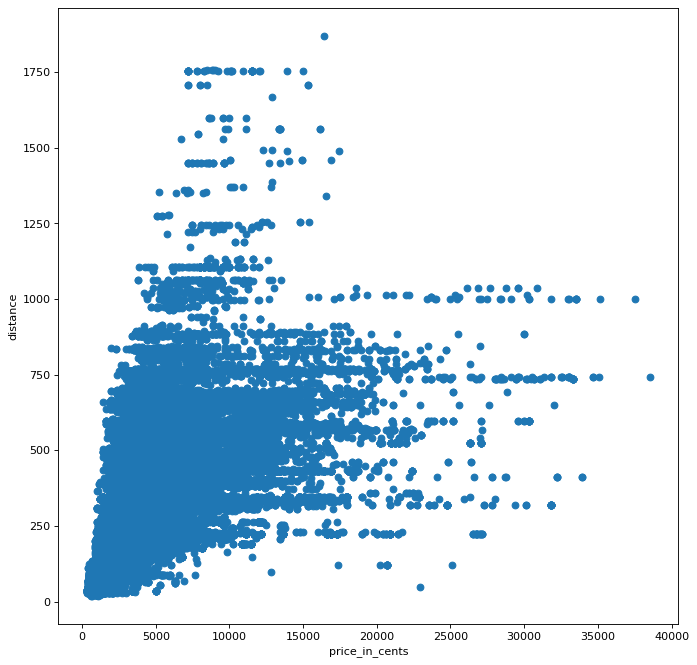

In [38]:
plot_res(ticket_df.price_in_cents, ticket_df.distance,
         "price_in_cents", "distance")

The price of tickets is increasing in an exponential way with the distance.

# Price Prediction

To predict the price, I tried SVC(Support Vector Classification) and Linear Regressions as ML models. The features are distance and transport_type, the label is price_in_cents. I tried to categories the data in transport_type column and to normalize the distance because it takes big values.

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = ticket_df[['transport_type', 'distance']]
data['distance'] = (data['distance']-data['distance'].mean()
                    )/data['distance'].std()
labels = ticket_df['price_in_cents']
le = LabelEncoder()
svc = SVC(verbose=True)
le.fit(['car', 'bus', 'carpooling', 'train'])
data['transport_cat'] = le.transform(data.transport_type)

train_X, test_X, train_y, test_y = train_test_split(data[['transport_cat', 'distance']],
                                                    labels, test_size=0.2)

C:\Users\Sarah Benabdallah\AppData\Local\Temp\ipykernel_17672\1364639570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance'] = (data['distance']-data['distance'].mean()
C:\Users\Sarah Benabdallah\AppData\Local\Temp\ipykernel_17672\1364639570.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transport_cat'] = le.transform(data.transport_type)


In [40]:
data_df = pd.concat([data, labels], axis=1)
print(len(data_df))
data_df.drop_duplicates(inplace=True, ignore_index=True)
print(len(data_df))

74168
15255


In [41]:
svc.fit(data_df[['distance', 'transport_cat']], data_df['price_in_cents'])

[LibSVM]

In [ ]:
predictionSVC = svc.predict(test_X)
print(mean_squared_error(predictionSVC, test_y))


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(
    data_df[['distance', 'transport_cat']], data_df['price_in_cents'])
predictionsLR = reg.predict(test_X)
print(mean_squared_error(predictionsLR, test_y))


I calculated the MSE to test the models. They didn't give good results because there are many other features that have to be add.